In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
df = pd.read_csv('JPMorgan Chase.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,49.833332,50.250000,48.083332,48.583332,24.406227,12019200
1,2000-01-04,47.083332,47.458332,46.125000,47.250000,23.870712,11723400
2,2000-01-05,46.833332,48.375000,46.000000,46.958332,23.723372,8714550
3,2000-01-06,46.750000,48.625000,46.500000,47.625000,24.060173,8369250
4,2000-01-07,48.416668,49.000000,47.333332,48.500000,24.502220,6571950


In [3]:
print('The dataset has a shape of {} rows and {} columns'.format(df.shape[0], df.shape[1]), '\n')
print('The dataset has {} duplicate rows'.format(df.duplicated().sum()), '\n')
print('The dataset has {} null values'.format(df.isnull().sum().sum()), '\n')

The dataset has a shape of 5863 rows and 7 columns 

The dataset has 0 duplicate rows 

The dataset has 0 null values 



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5863 entries, 0 to 5862
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5863 non-null   object 
 1   Open       5863 non-null   float64
 2   High       5863 non-null   float64
 3   Low        5863 non-null   float64
 4   Close      5863 non-null   float64
 5   Adj Close  5863 non-null   float64
 6   Volume     5863 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 320.8+ KB


# EDA

## Open
* Open price here means the first price of the day ie the price when the market opens

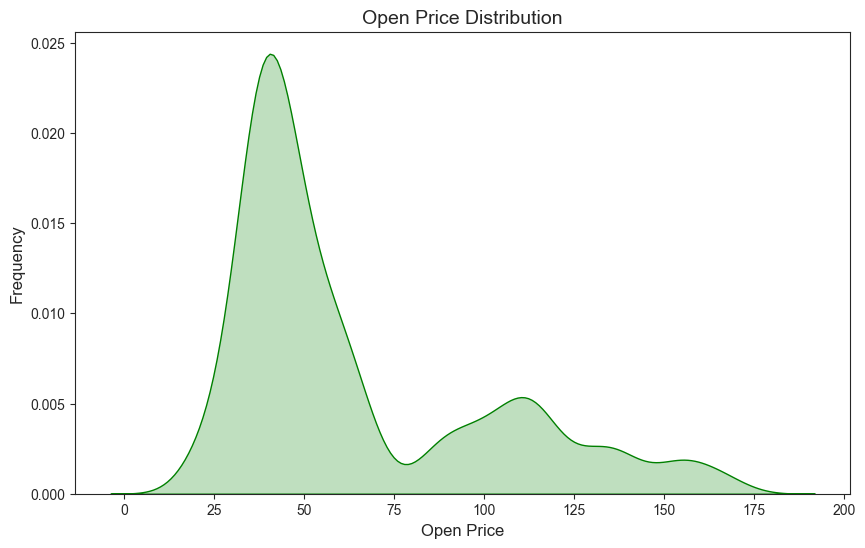

In [6]:
# Open price distribution
sns.set_style('ticks')
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Open'], shade=True, color='g')
plt.title('Open Price Distribution', fontsize=14)
plt.xlabel('Open Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show();


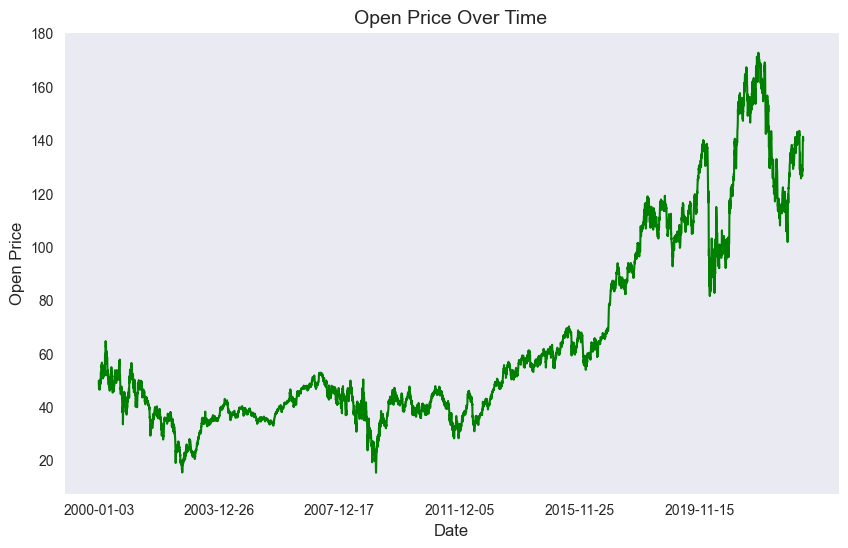

In [10]:
# Open price over time
df["Open"].groupby(df["Date"]).mean().plot(figsize=(10, 6), color='g')
plt.title('Open Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Open Price', fontsize=12)
plt.show();

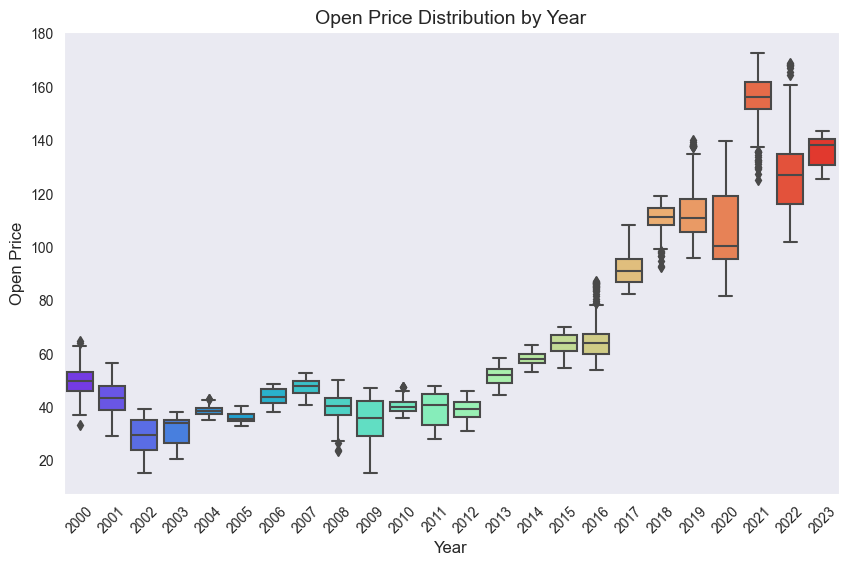

In [12]:
# Do a year by year trend analysis of the open price
#df['Year'] = pd.DatetimeIndex(df['Date']).year

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Open', data=df, palette='rainbow')
plt.title('Open Price Distribution by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Open Price', fontsize=12)
plt.show();

* We can easily notice that a dip in early 2000s followed by a steady fluctuation in mid 2000s and then a sharp rise in the later years. (Where a dip is a fall in the price of the stock and a rise is a rise in the price of the stock.)

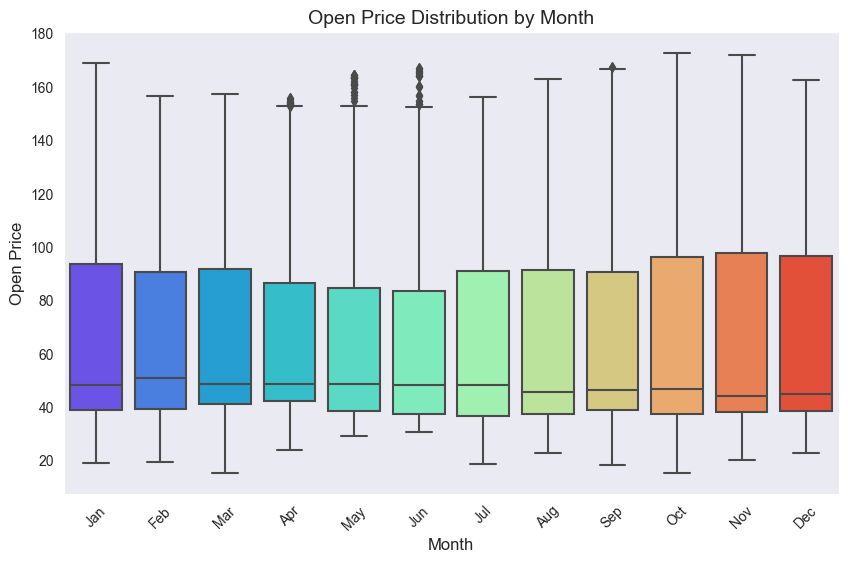

In [14]:
# Open price distribution by month 
#df['Month'] = pd.DatetimeIndex(df['Date']).month

plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Open', data=df, palette='rainbow')
plt.title('Open Price Distribution by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
# replace the x ticks labels with the month names
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                            'Nov', 'Dec'), rotation=45)
plt.ylabel('Open Price', fontsize=12)
plt.show();

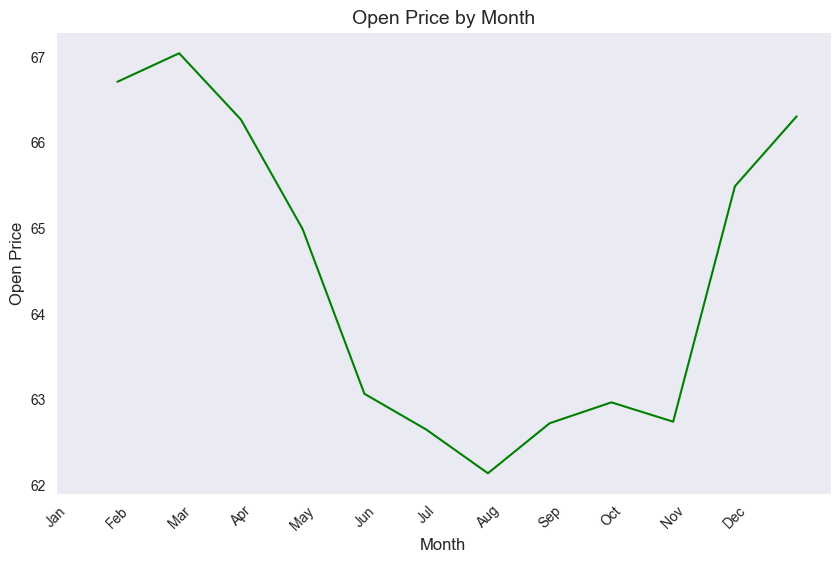

In [16]:
# Line plot of the open price by month
df["Open"].groupby(df["Month"]).mean().plot(figsize=(10, 6), color='g')
plt.title('Open Price by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                            'Nov', 'Dec'), rotation=45) 
plt.ylabel('Open Price', fontsize=12)
plt.show();

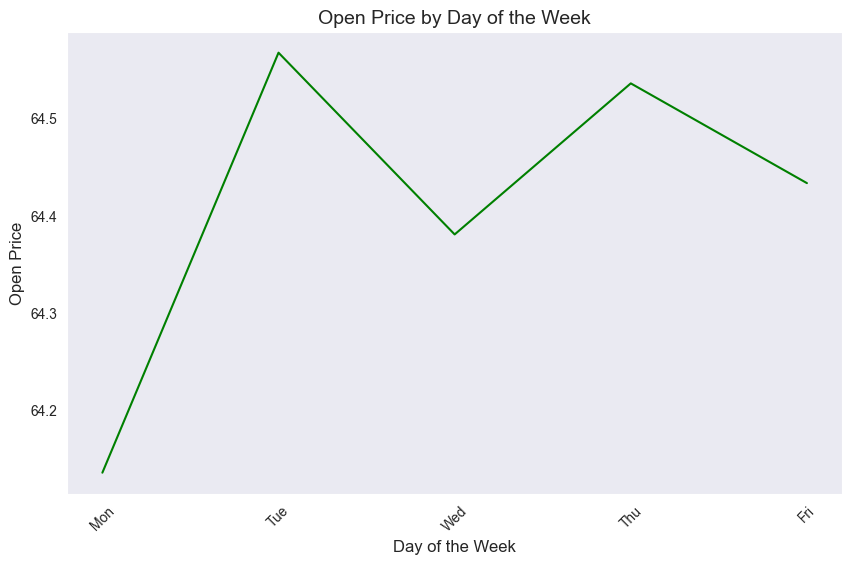

In [17]:
# Open price distribution by day of the week
df['Day'] = pd.DatetimeIndex(df['Date']).dayofweek

df['Open'].groupby(df['Day']).mean().plot(figsize=(10, 6), color='g')
plt.title('Open Price by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Open Price', fontsize=12)
plt.xticks(np.arange(5), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri'), rotation=45)
plt.show();

* The highest opening price is usually on Tuesday and the lowest opening price is usually on Monday


## Close
* Close is the closing price ie the price when the market closes

<Figure size 1000x600 with 0 Axes>

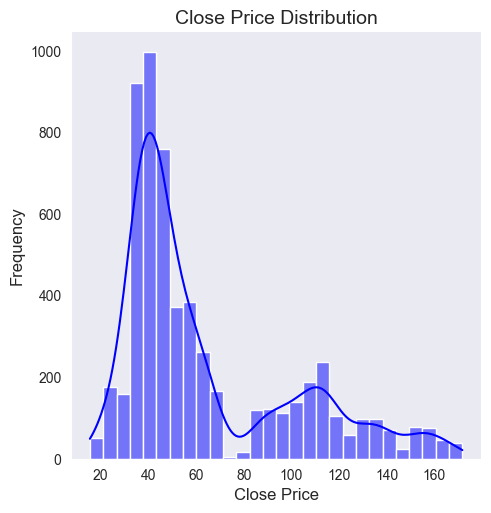

In [20]:
# Close price distribution
plt.figure(figsize=(10, 6))
sns.displot(df['Close'], color='b', kde=True)
plt.title('Close Price Distribution', fontsize=14)
plt.xlabel('Close Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show();

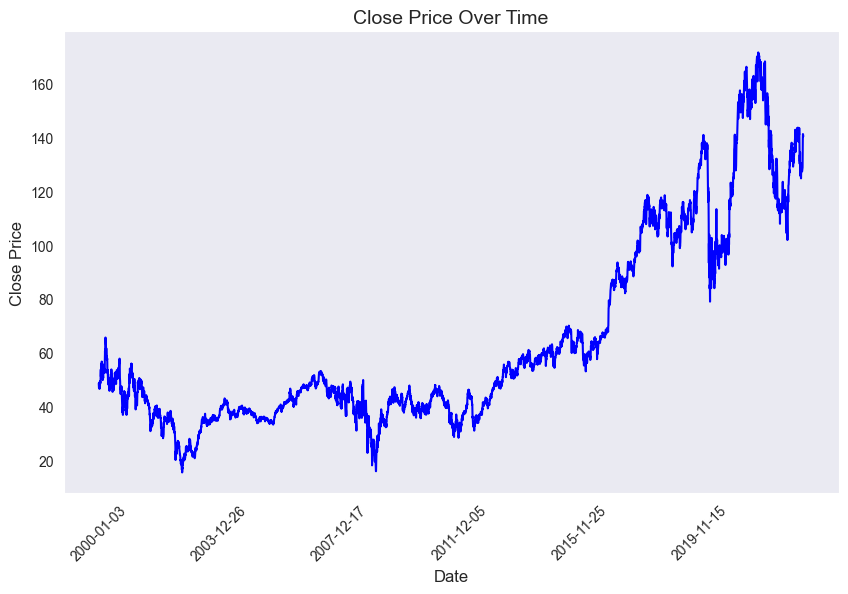

In [22]:
# Closing price over time
df['Close'].groupby(df['Date']).mean().plot(figsize=(10, 6), color='b')
plt.title('Close Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Close Price', fontsize=12)
plt.show();

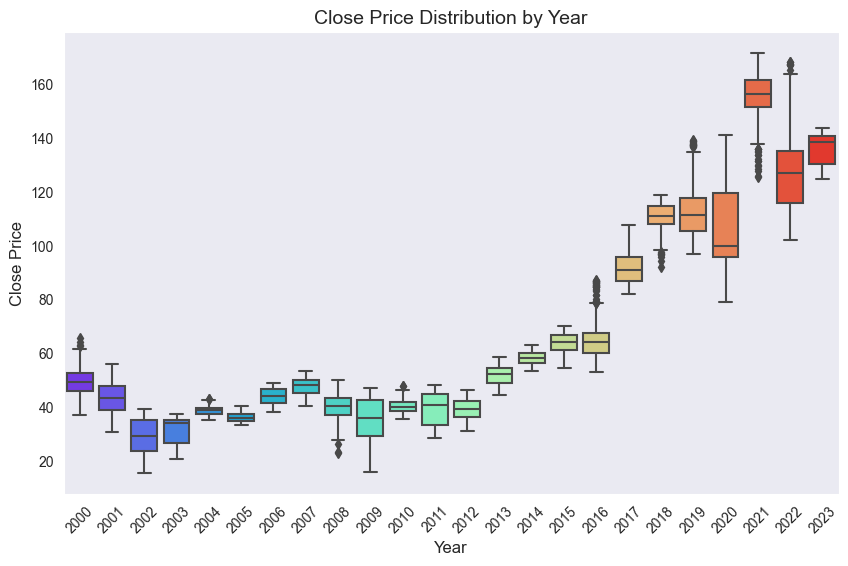

In [23]:
# Do a year by year trend analysis of the close price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Close', data=df, palette='rainbow')
plt.title('Close Price Distribution by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Close Price', fontsize=12)
plt.show();

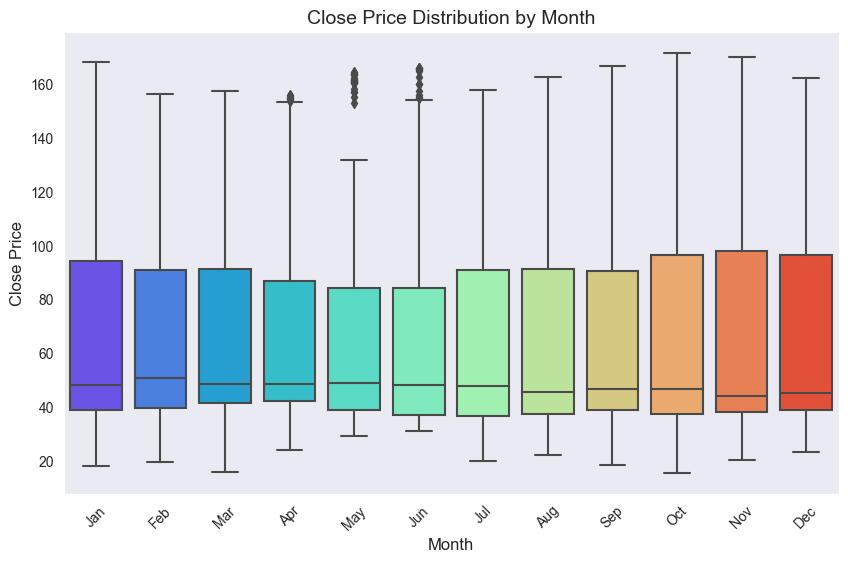

In [24]:
# Close price distribution by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Close', data=df, palette='rainbow')
plt.title('Close Price Distribution by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                            'Nov', 'Dec'), rotation=45) 
plt.ylabel('Close Price', fontsize=12)
plt.show();

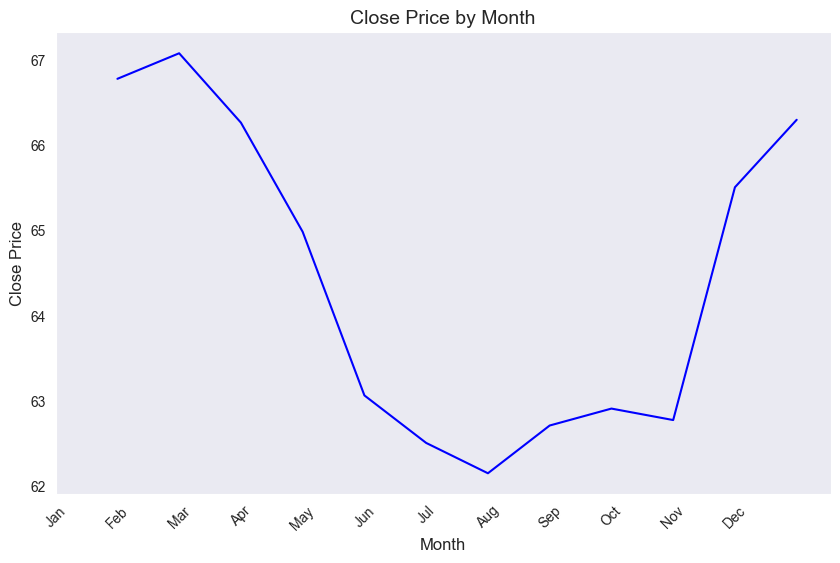

In [25]:
# Line plot of the close price by month
df['Close'].groupby(df['Month']).mean().plot(figsize=(10, 6), color='b')
plt.title('Close Price by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                            'Nov', 'Dec'), rotation=45)
plt.ylabel('Close Price', fontsize=12)
plt.show();

* Both closing and opening prices dip in August

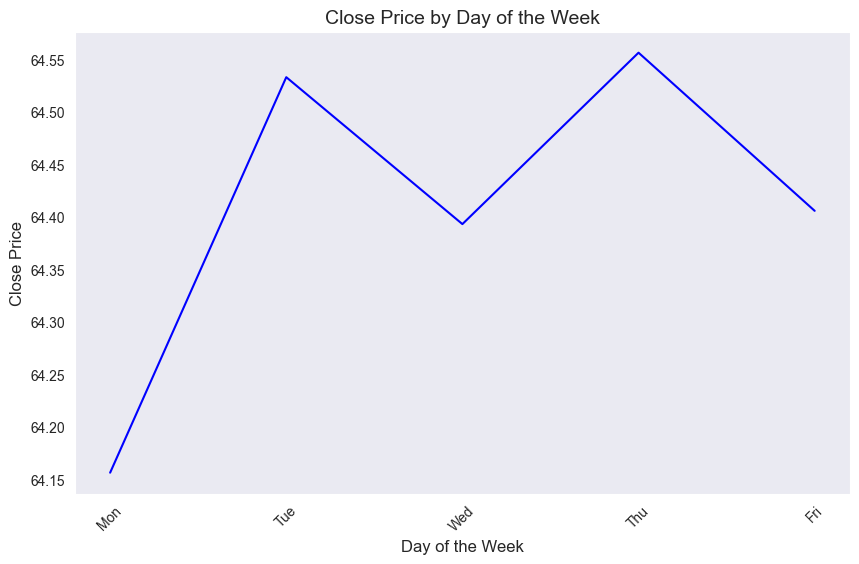

In [26]:
# Close price distribution by day of the week
df['Close'].groupby(df['Day']).mean().plot(figsize=(10, 6), color='b')
plt.title('Close Price by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.xticks(np.arange(5), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri'), rotation=45)
plt.show();

## Adjusted close
* Adjusted close is the closing price adjusted for stock splits and dividends

<Figure size 1000x600 with 0 Axes>

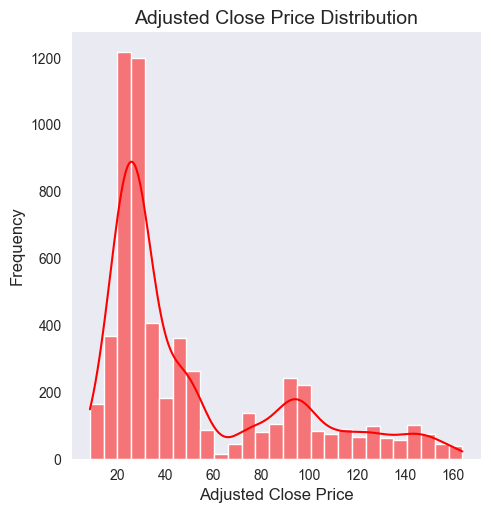

In [27]:
# Adjusted close price distribution
plt.figure(figsize=(10, 6))
sns.displot(df['Adj Close'], color='r', kde=True)
plt.title('Adjusted Close Price Distribution', fontsize=14)
plt.xlabel('Adjusted Close Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show();

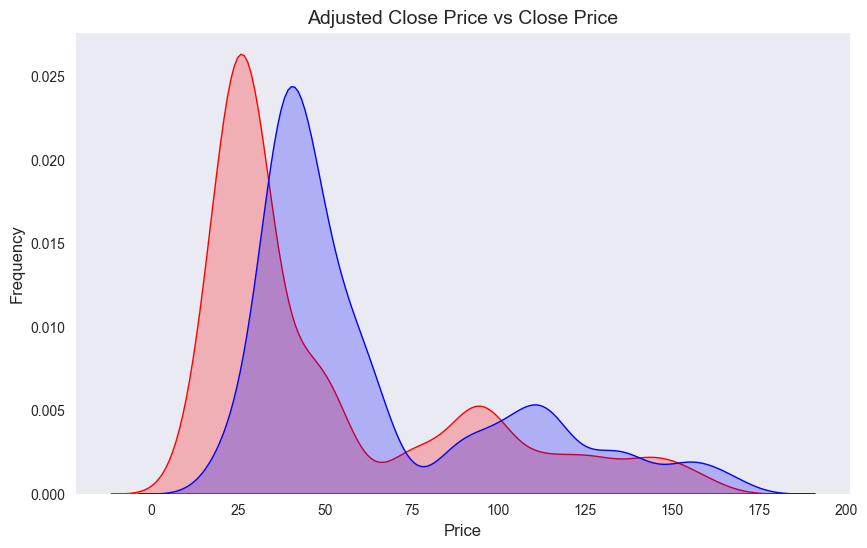

In [28]:
# Comparing Adjusted close and close price
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Adj Close'], shade=True, color='r')
sns.kdeplot(df['Close'], shade=True, color='b')
plt.title('Adjusted Close Price vs Close Price', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show();

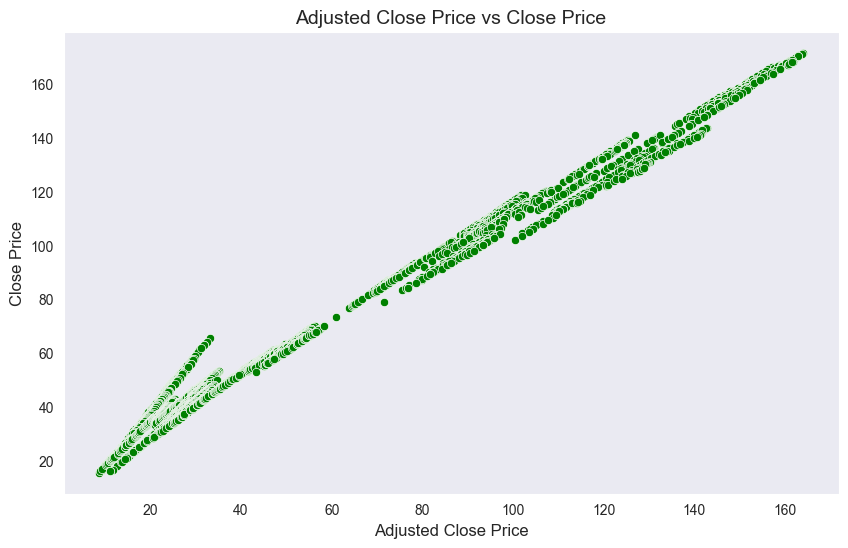

In [29]:
# scatterplot of the adjusted close price vs the close price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adj Close', y='Close', data=df, color='g')
plt.title('Adjusted Close Price vs Close Price', fontsize=14)
plt.xlabel('Adjusted Close Price', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.show();

## Volume
* Volume is the number of shares traded on a particular day

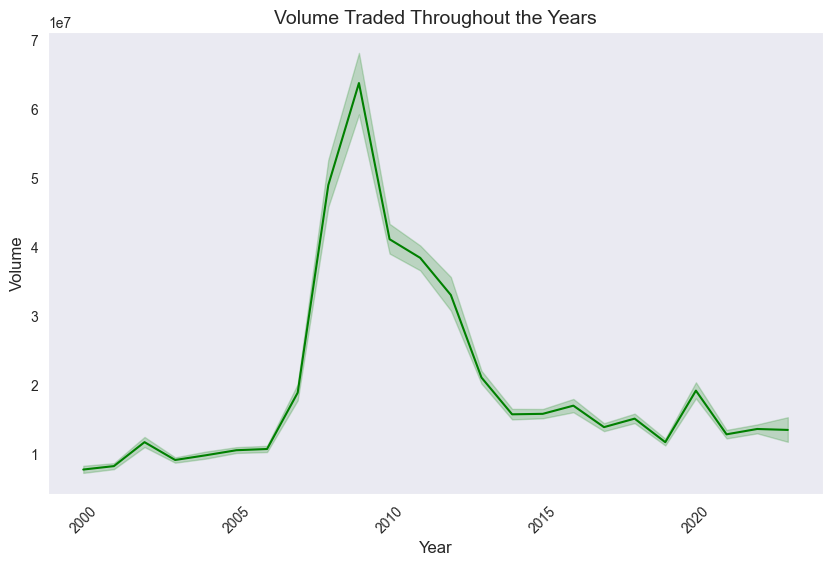

In [30]:
# volume traded throughout the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Volume', data=df, color='g')
plt.title('Volume Traded Throughout the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Volume', fontsize=12)
plt.show();

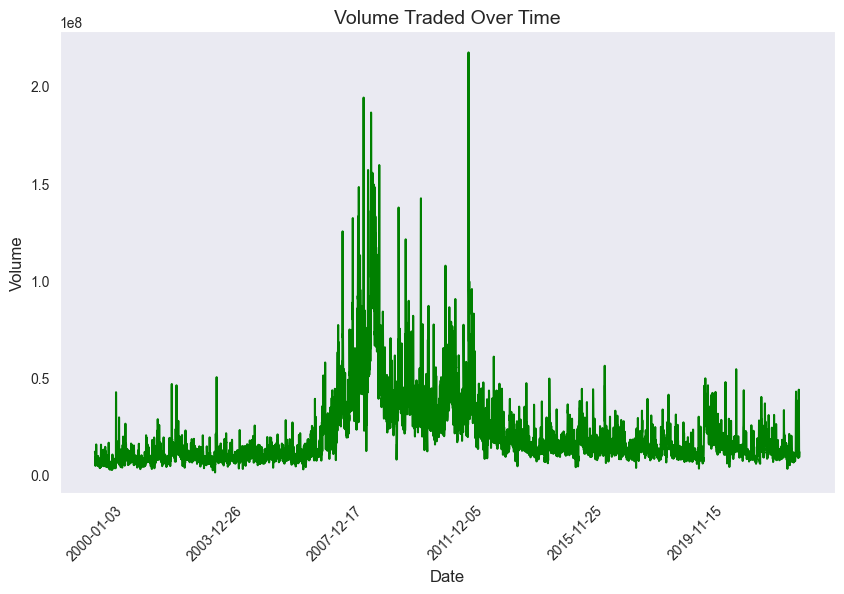

In [31]:
# Volume by date
df['Volume'].groupby(df['Date']).mean().plot(figsize=(10, 6), color='g')
plt.title('Volume Traded Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Volume', fontsize=12)
plt.show();

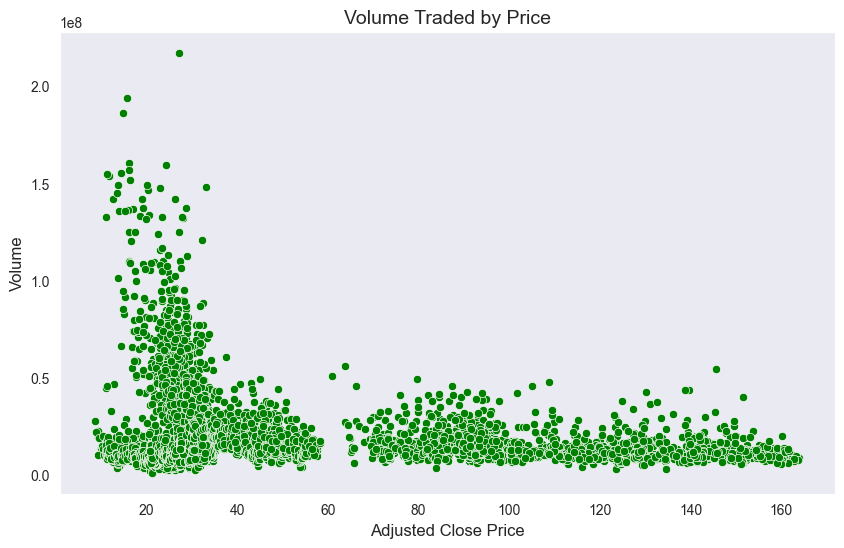

In [32]:
# Volume by price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adj Close', y='Volume', data=df, color='g')
plt.title('Volume Traded by Price', fontsize=14)
plt.xlabel('Adjusted Close Price', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.show();

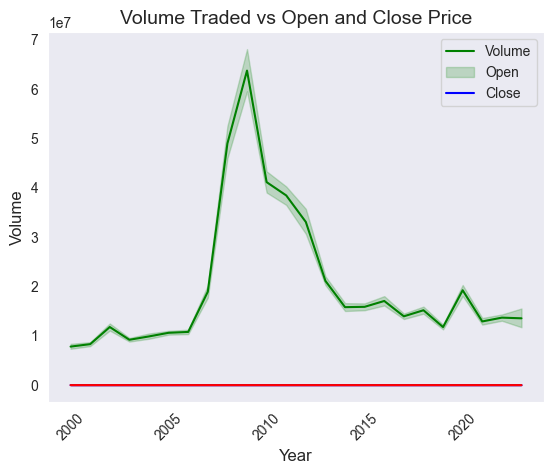

In [33]:
sns.lineplot(x='Year', y='Volume', data=df, color='g')
sns.lineplot(x='Year', y='Open', data=df, color='b')
sns.lineplot(x='Year', y='Close', data=df, color='r')
plt.title('Volume Traded vs Open and Close Price', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Volume', fontsize=12)
plt.legend(labels=['Volume', 'Open', 'Close'])
plt.show();

In [34]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2000-01-03,49.833332,50.250000,48.083332,48.583332,24.406227,12019200,2000,1,0
1,2000-01-04,47.083332,47.458332,46.125000,47.250000,23.870712,11723400,2000,1,1
2,2000-01-05,46.833332,48.375000,46.000000,46.958332,23.723372,8714550,2000,1,2
3,2000-01-06,46.750000,48.625000,46.500000,47.625000,24.060173,8369250,2000,1,3
4,2000-01-07,48.416668,49.000000,47.333332,48.500000,24.502220,6571950,2000,1,4


## High
* High is the highest price of the stock on a particular day

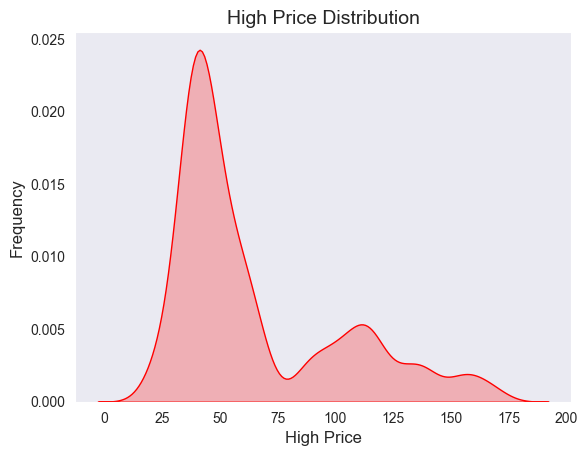

In [35]:
# High price distribution
sns.kdeplot(df['High'], shade=True, color='r')
plt.title('High Price Distribution', fontsize=14)
plt.xlabel('High Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show();

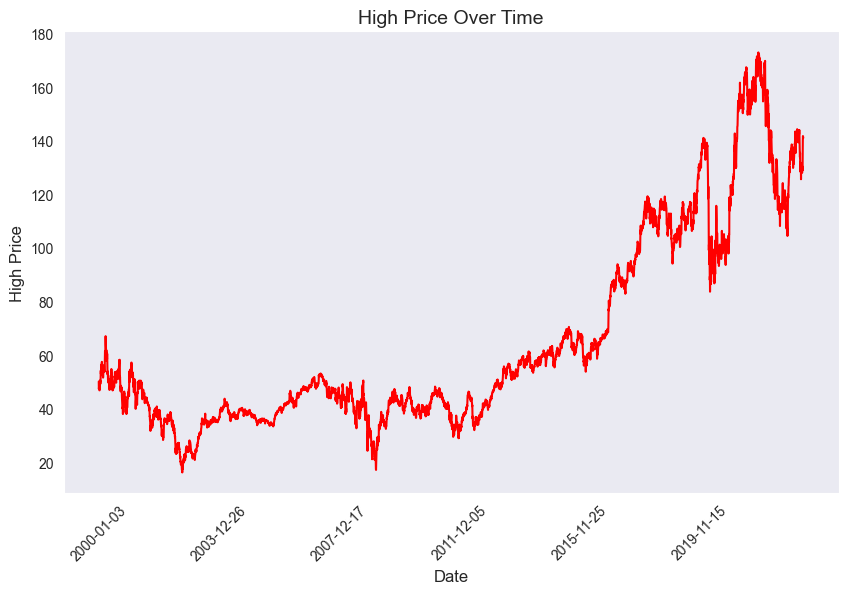

In [36]:
# High price by date
df['High'].groupby(df['Date']).mean().plot(figsize=(10, 6), color='r')
plt.title('High Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('High Price', fontsize=12)
plt.show();

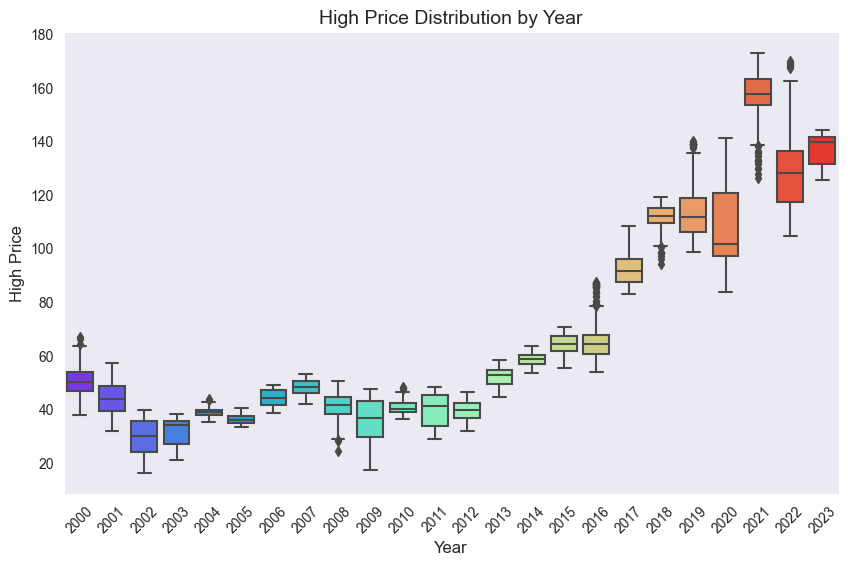

In [37]:
# Boxplot of the high price by year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='High', data=df, palette='rainbow')
plt.title('High Price Distribution by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('High Price', fontsize=12)
plt.show();

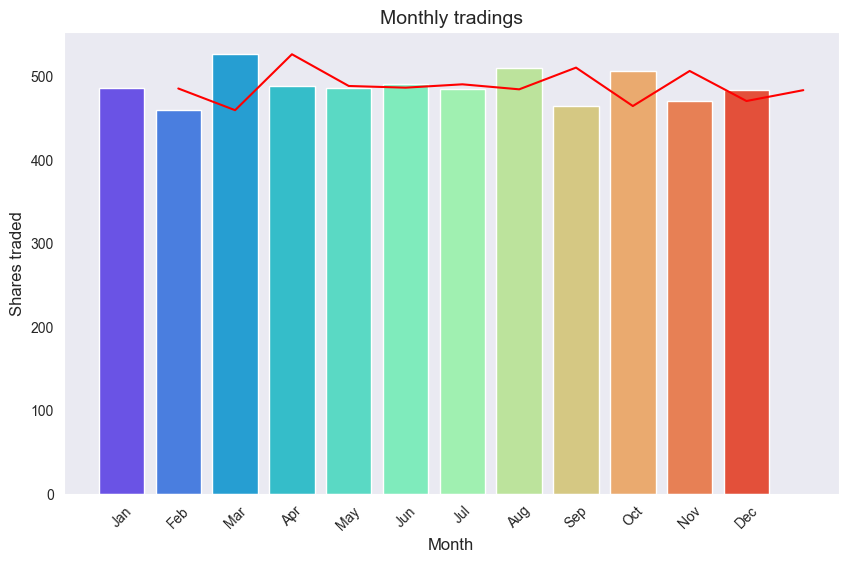

In [44]:
plt.figure(figsize=(10, 6))
x = df['Month'].value_counts().index
y = df['Month'].value_counts().values
sns.barplot(x=x, y=y, palette='rainbow')
sns.lineplot(x=x, y=y, color='r')
plt.title('Monthly tradings', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',        
                            'Nov', 'Dec'), rotation=45)
plt.ylabel('Shares traded', fontsize=12)
plt.show();

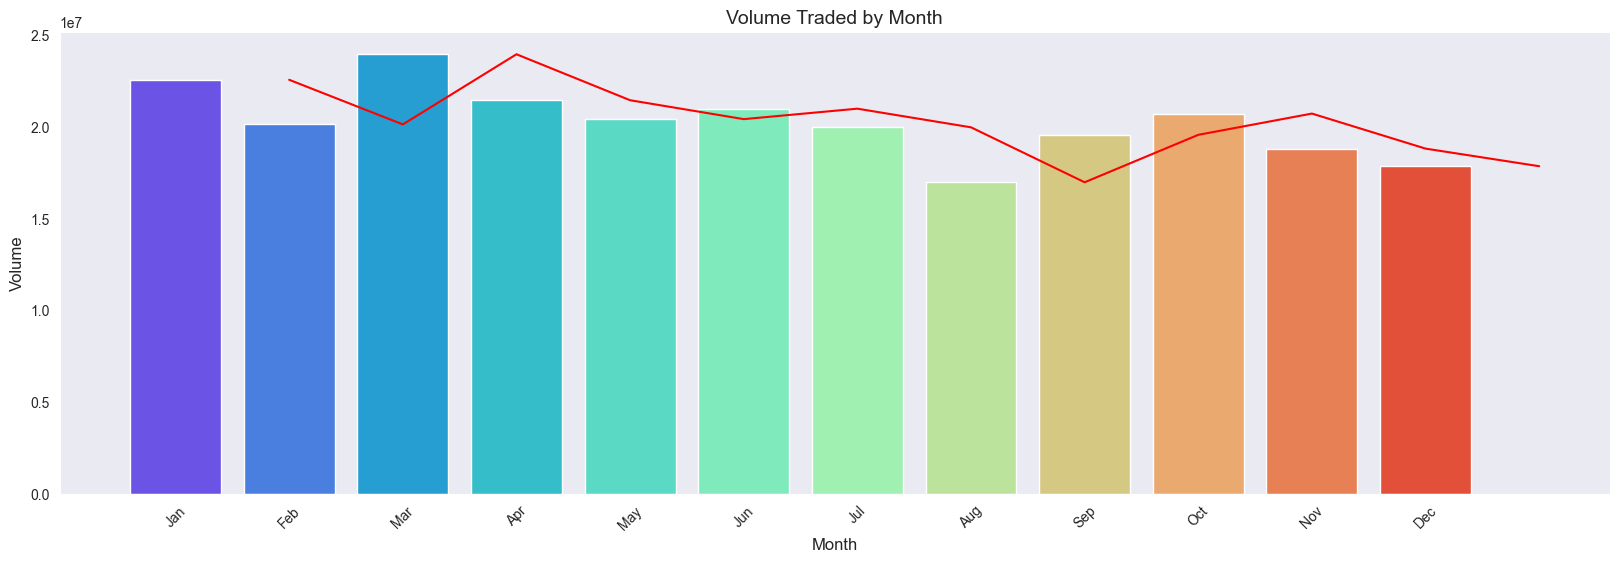

In [43]:
x = df['Volume'].groupby(df['Month']).mean().index
y = df['Volume'].groupby(df['Month']).mean().values
plt.figure(figsize=(20, 6))
sns.barplot(x=x, y=y, palette='rainbow')
sns.lineplot(x=x, y=y, color='r')
plt.title('Volume Traded by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                            'Nov', 'Dec'), rotation=45)
plt.ylabel('Volume', fontsize=12)
plt.show();


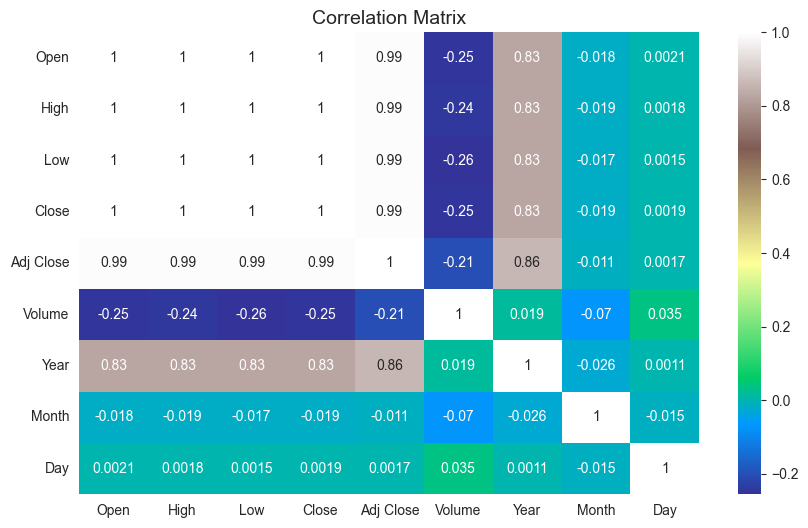

In [50]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='terrain')
plt.title('Correlation Matrix', fontsize=14);

# Modelling

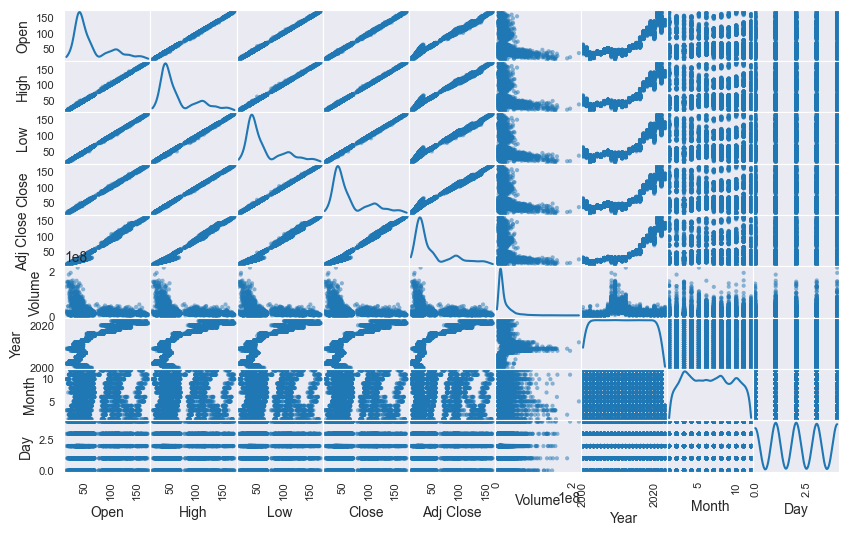

In [51]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.select_dtypes('number'), figsize=(10, 6), diagonal='kde')
plt.show();

In [52]:
# Correlation between the adjusted close price and the other variables
df.select_dtypes('number').corr()['Adj Close'].sort_values(ascending=False)

Adj Close    1.000000
Close        0.994273
High         0.994183
Low          0.993942
Open         0.993919
Year         0.861146
Day          0.001733
Month       -0.010683
Volume      -0.206139
Name: Adj Close, dtype: float64

The prediction on the test set is [ 17.1942073   23.10161006 150.02538196 ...  19.49456243  67.77476971
  11.73691674]
The mean absolute error is 2.428052478309852 

The mean squared error is 9.328468260389037 

The root mean squared error is 3.0542541250506705 

The coefficient of determination is 0.9938847745036814


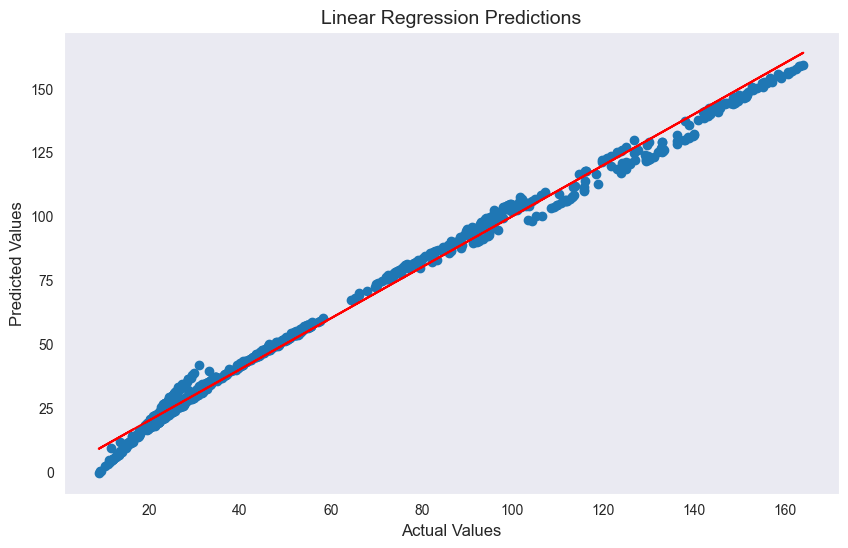

In [53]:
# Model to predict the adjusted close price
# Splitting data
X = df.drop(['Adj Close', 'Date', 'Day', 'Month'], axis=1)
y = df['Adj Close']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Linear Regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions on the test set
lr_y_pred = lr.predict(X_test)
print(f'The prediction on the test set is {lr_y_pred}')

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f'The mean absolute error is {mean_absolute_error(y_test, lr_y_pred)}', '\n')
print(f'The mean squared error is {mean_squared_error(y_test, lr_y_pred)}', '\n')
print(f'The root mean squared error is {np.sqrt(mean_squared_error(y_test, lr_y_pred))}', '\n')
print(f'The coefficient of determination is {r2_score(y_test, lr_y_pred)}')

# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_y_pred)
plt.plot(y_test, y_test, 'r')
plt.title('Linear Regression Predictions', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.show();

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.582e+04, tolerance: 6.836e+02
  model = cd_fast.enet_coordinate_descent(


The prediction on the test set is [ 17.84245923  23.5638734  149.70214896 ...  19.94126295  67.41291364
  11.96813168]
The mean absolute error is 2.4144912637243343 

The mean squared error is 9.707825795173047 

The root mean squared error is 3.1157384028786894 

The coefficient of determination is 0.9936360887812051


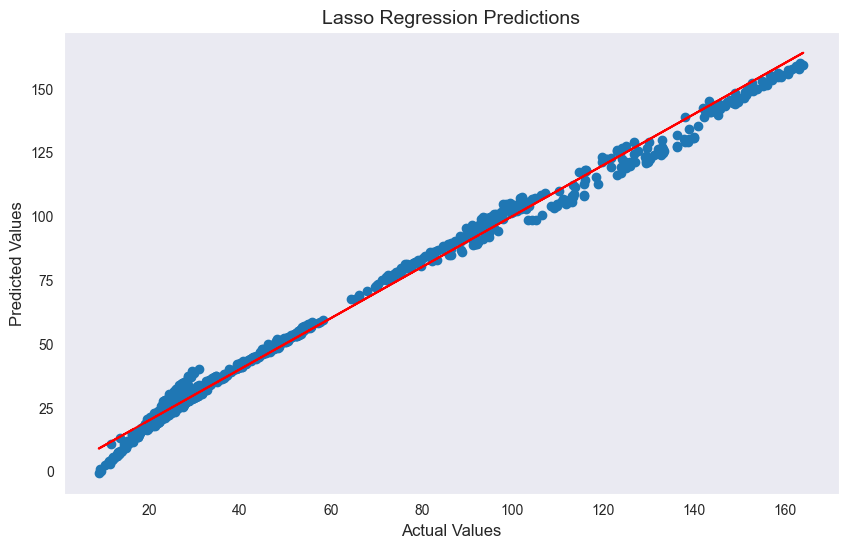

In [55]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)

# Predictions on the test set
lasso_y_pred = lasso.predict(X_test)
print(f'The prediction on the test set is {lasso_y_pred}')

# Evaluation
print(f'The mean absolute error is {mean_absolute_error(y_test, lasso_y_pred)}', '\n')
print(f'The mean squared error is {mean_squared_error(y_test, lasso_y_pred)}', '\n')
print(f'The root mean squared error is {np.sqrt(mean_squared_error(y_test, lasso_y_pred))}', '\n')
print(f'The coefficient of determination is {r2_score(y_test, lasso_y_pred)}')

# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_y_pred)
plt.plot(y_test, y_test, 'r')
plt.title('Lasso Regression Predictions', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.show();

The prediction on the test set is [ 18.963722  23.884588 152.398544 ...  21.870102  64.993179  16.53426 ] 

The mean absolute error is 0.3506001739130434 

The mean squared error is 0.3961116855249854 

The root mean squared error is 0.6293740426209087 

The coefficient of determination is 0.9997403311871684


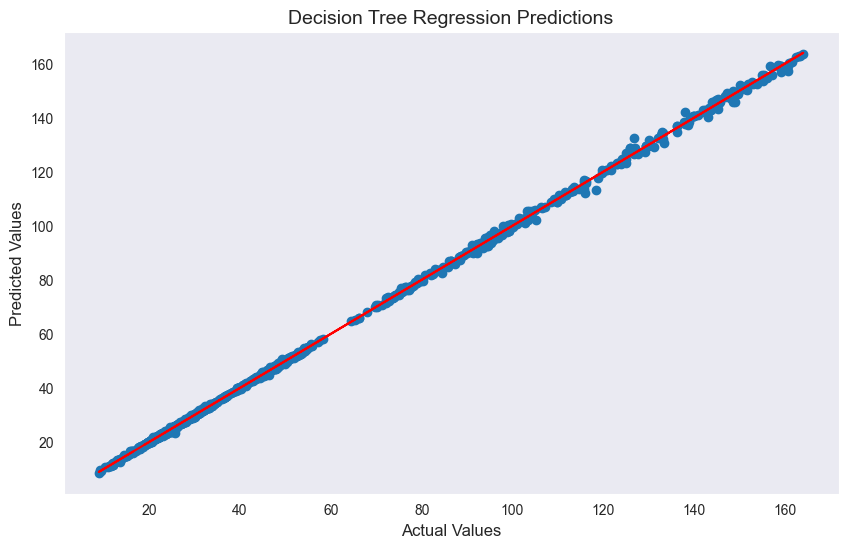

In [56]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Predictions on the test set
dt_y_pred = dt.predict(X_test)
print(f'The prediction on the test set is {dt_y_pred}', '\n')

# Evaluation
print(f'The mean absolute error is {mean_absolute_error(y_test, dt_y_pred)}', '\n')
print(f'The mean squared error is {mean_squared_error(y_test, dt_y_pred)}', '\n')
print(f'The root mean squared error is {np.sqrt(mean_squared_error(y_test, dt_y_pred))}', '\n')
print(f'The coefficient of determination is {r2_score(y_test, dt_y_pred)}')

# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_y_pred)
plt.plot(y_test, y_test, 'r')
plt.title('Decision Tree Regression Predictions', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.show();

The prediction on the test set is [ 18.98696213  23.90161906 152.93156062 ...  21.71862494  65.28732351
  16.47087592] 

The mean absolute error is 0.28583046693094927 

The mean squared error is 0.25063910363258346 

The root mean squared error is 0.5006386957003858 

The coefficient of determination is 0.9998356949293148


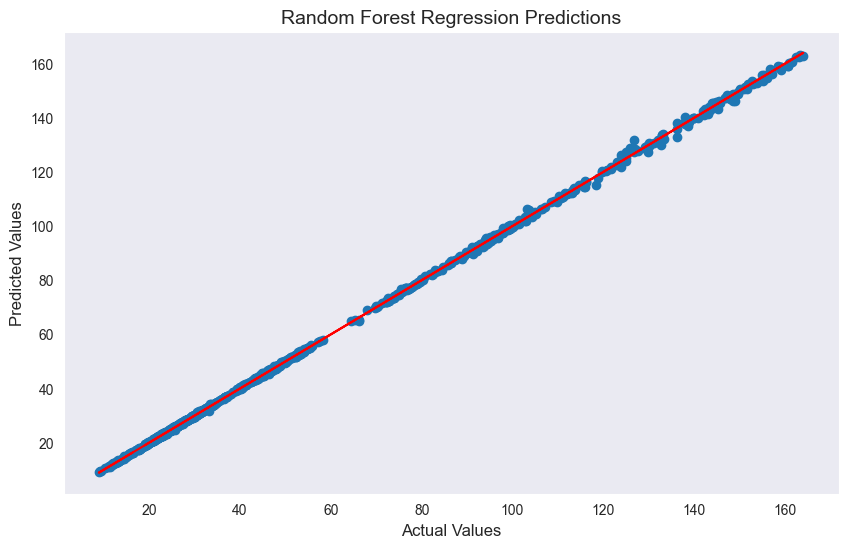

In [57]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predictions on the test set
rf_y_pred = rf.predict(X_test)
print(f'The prediction on the test set is {rf_y_pred}', '\n')

# Evaluation
print(f'The mean absolute error is {mean_absolute_error(y_test, rf_y_pred)}', '\n')
print(f'The mean squared error is {mean_squared_error(y_test, rf_y_pred)}', '\n')
print(f'The root mean squared error is {np.sqrt(mean_squared_error(y_test, rf_y_pred))}', '\n')
print(f'The coefficient of determination is {r2_score(y_test, rf_y_pred)}')

# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred)
plt.plot(y_test, y_test, 'r')
plt.title('Random Forest Regression Predictions', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.show();

The prediction on the test set is [ 19.091452  24.385178 152.92952  ...  21.672598  65.25499   16.35441 ] 

The mean absolute error is 0.335320691956555 

The mean squared error is 0.29918847658153397 

The root mean squared error is 0.5469812396979754 

The coefficient of determination is 0.9998038686578412


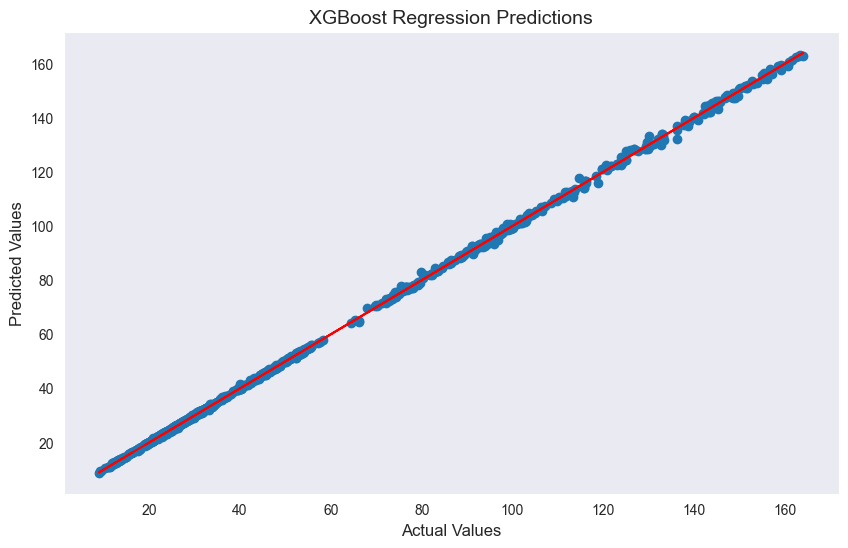

In [58]:
# XGBoost Regression (my personal favourite)
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# Predictions on the test set
xgb_y_pred = xgb.predict(X_test)
print(f'The prediction on the test set is {xgb_y_pred}', '\n')

# Evaluation
print(f'The mean absolute error is {mean_absolute_error(y_test, xgb_y_pred)}', '\n')
print(f'The mean squared error is {mean_squared_error(y_test, xgb_y_pred)}', '\n')
print(f'The root mean squared error is {np.sqrt(mean_squared_error(y_test, xgb_y_pred))}', '\n')
print(f'The coefficient of determination is {r2_score(y_test, xgb_y_pred)}')

# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_y_pred)
plt.plot(y_test, y_test, 'r')
plt.title('XGBoost Regression Predictions', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.show();

In [62]:
# Testing the model on a new data
new_data = [[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data = scaler.fit_transform(new_data)

import numpy as np

# Testing the model on a new data
new_data = np.array([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575]])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data = scaler.fit_transform(new_data)

print(f'The prediction on the new data is {xgb.predict(new_data)}')    

The prediction on the new data is [9.107209]


In [63]:
# Save the model
import pickle
pickle.dump(xgb, open('jp_morgan_model.pkl', 'wb'))

In [65]:
X_test.head()

,Open,High,Low,Close,Volume,Year
589,35.939999,36.000000,35.000000,35.080002,5472400,2002
3129,34.369999,34.439999,32.779999,32.820000,46404900,2012
5515,159.830002,163.250000,158.800003,161.210007,12969900,2021
3038,37.529999,37.540001,36.930000,37.299999,29649500,2012
980,35.299999,35.650002,35.200001,35.509998,3922400,2003


In [ ]:
# Testing the model on a new data
new_data = np.array([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575]]) # arranged from the original dataset ie X_test